In [56]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exercício 1

In [24]:
def moment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

def degree_distribution(GER):
    vk = dict(GER.degree())
    vk = list(vk.values()) # we get only the degree values
    maxk = np.max(vk)
    mink = np.min(min)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

def compute_statistics(g, g_type):
    avg_deg = len(g)/g.number_of_edges()
    second_m = moment_of_degree_distribution(g, 2)
    short = nx.average_shortest_path_length(g)
    clust = nx.average_clustering(g)
    transit = nx.transitivity(g)
    assort = nx.degree_assortativity_coefficient(g)
    return [len(g), avg_deg, second_m, short, clust, transit, assort, g_type]

In [28]:
net_df = pd.DataFrame(columns=['n','Avg.Deg.','2nd.Mom.','Avg.Short.Path','Avg.Clustering',
                               'Transitivity','Assortativity','Model'])

k = 10
n = 500
p = k/(n-1)
for i in range(10):
    er = nx.gnp_random_graph(n=n, p=p, seed=None, directed=False)
    net_df.loc[i] = compute_statistics(er, 'Erdos-Renyi')

n = 500
p = 0.01
k = 10
for i in range(10, 15):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')
    
n = 500
p = 0.1
k = 10
for i in range(15, 20):
    ws = nx.watts_strogatz_graph(n, k, p, seed=None)
    net_df.loc[i] = compute_statistics(er, 'Watts-Strogatz')

n = 500
p = 0.1
k = 10
for i in range(20, 30):
    ba = nx.barabasi_albert_graph(n, int(k/2))
    net_df.loc[i] = compute_statistics(ba, 'Barabasi-Albert')
    
net_df

,n,Avg.Deg.,2nd.Mom.,Avg.Short.Path,Avg.Clustering,Transitivity,Assortativity,Model
0,500,0.201369,108.612,2.945066,0.023472,0.022375,-0.016450,Erdos-Renyi
1,500,0.206271,103.508,2.977988,0.020130,0.019315,-0.034918,Erdos-Renyi
2,500,0.196618,114.800,2.929251,0.019531,0.018924,0.049746,Erdos-Renyi
3,500,0.198728,110.600,2.930733,0.018872,0.018501,0.003629,Erdos-Renyi
4,500,0.198255,110.628,2.931102,0.021453,0.021245,-0.000649,Erdos-Renyi
5,500,0.195084,115.204,2.916721,0.020291,0.020123,0.008698,Erdos-Renyi
6,500,0.194780,115.436,2.910341,0.017484,0.018142,-0.002786,Erdos-Renyi
7,500,0.199760,109.700,2.937707,0.021000,0.020705,-0.033494,Erdos-Renyi
8,500,0.200803,108.400,2.946445,0.018315,0.016944,0.012378,Erdos-Renyi
9,500,0.192901,117.268,2.898782,0.019104,0.019420,-0.010224,Erdos-Renyi


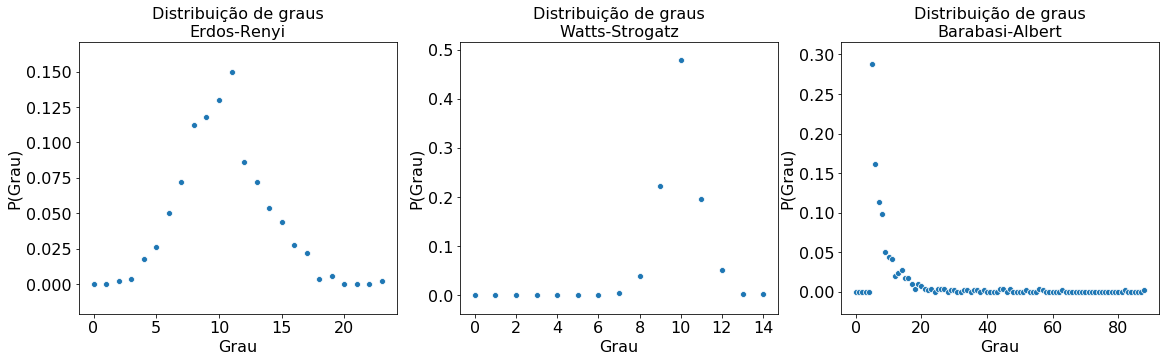

In [73]:
def set_ax_fontsize(ax, fontsize):
    ax.title.set_fontsize(fontsize)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    [tick.set_fontsize(fontsize) for tick in ax.get_xticklabels()];
    [tick.set_fontsize(fontsize) for tick in ax.get_yticklabels()];

fig, axis = plt.subplots(1,3, figsize=(8,5))

k_er, pk_er = degree_distribution(er)
plt.subplots_adjust(right=2)
axis[0].set_xlabel('Grau')
axis[0].set_ylabel('P(Grau)')
axis[0].set_title('Distribuição de graus\nErdos-Renyi')
set_ax_fontsize(axis[0], 16)
sns.scatterplot(x=k_er, y=pk_er, ax=axis[0])

k_ws, pk_ws = degree_distribution(ws)
axis[1].set_xlabel('Grau')
axis[1].set_ylabel('P(Grau)')
axis[1].set_title('Distribuição de graus\nWatts-Strogatz')
set_ax_fontsize(axis[1], 16)
sns.scatterplot(x=k_ws, y=pk_ws, ax=axis[1]);

k_ba, pk_ba = degree_distribution(ba)
axis[2].set_xlabel('Grau')
axis[2].set_ylabel('P(Grau)')
axis[2].set_title('Distribuição de graus\nBarabasi-Albert')
set_ax_fontsize(axis[2], 16)
sns.scatterplot(x=k_ba, y=pk_ba, ax=axis[2]);